In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar el archivo JSON forzando 'user_id' a ser de tipo str
file_path = 'review_Pennsylvania.json'
df_pennsylvania = pd.read_json(file_path, dtype={'user_id': str})

In [3]:
# Vista inicial de datos
df_pennsylvania.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,104944742559079759337,Jaron Whitfield,1517731762839,5,"Joe is quite unique of his line of work, he as...",None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
1,117609702832980320437,Jonathan McCarthy,1476276291163,5,For such a small place their impact on my life...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
2,110563242018426632956,Rocky Kev,1338826945578,5,I usually give them a call before I stop by to...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
3,112895973505401399406,Josep Valls,1363286110554,5,My bike had been sitting outdoors for a good w...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb
4,110619674885963828884,Timaree Schmit,1548798329760,5,Always an easy experience. Service is knowledg...,None,None,0x89c6c63c8cd87141:0x54d0d283872eecbb


In [4]:
df_pennsylvania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 146.5+ MB


In [5]:
# Conteo de reseñas totales
total_reviews_pennsylvania = df_pennsylvania.shape[0]
print(f"Total de reseñas en Pennsylvania: {total_reviews_pennsylvania}")

Total de reseñas en Pennsylvania: 2400000


In [6]:
# Valores faltantes
nulos_pennsylvania = df_pennsylvania.isnull().sum()
nulos_pennsylvania

user_id          0
name             0
time             0
rating           0
text       1041386
pics       2342190
resp       2099889
gmap_id          0
dtype: int64

In [7]:
# Definir las columnas a considerar para la duplicación
columns_to_check = df_pennsylvania.columns.difference(['pics', 'resp'])

# Encontrar filas duplicadas considerando solo las columnas especificadas
duplicated_rows = df_pennsylvania.duplicated(subset=columns_to_check)

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

print(
    f"Número de filas duplicadas (sin contar 'pics' y 'resp'): {num_duplicated_rows}")

Número de filas duplicadas (sin contar 'pics' y 'resp'): 33568


In [8]:
# Calcular el porcentaje de datos utilizables
percent_data_usable_pennsylvania = (
    df_pennsylvania.notnull().sum() / total_reviews_pennsylvania) * 100

# Redondear a 2 decimales
percent_data_usable_pennsylvania = percent_data_usable_pennsylvania.round(2)

# Formatear y mostrar los resultados
print('Porcentaje de datos utilizables en Pennsylvania:')
for column, value in percent_data_usable_pennsylvania.items():
    print(f'{column}: {value:.2f}%')

Porcentaje de datos utilizables en Pennsylvania:
user_id: 100.00%
name: 100.00%
time: 100.00%
rating: 100.00%
text: 56.61%
pics: 2.41%
resp: 12.50%
gmap_id: 100.00%


Frecuencia de cada valor de rating en Pennsylvania:
1     124412
2      70854
3     199502
4     461032
5    1544200
Name: rating, dtype: int64


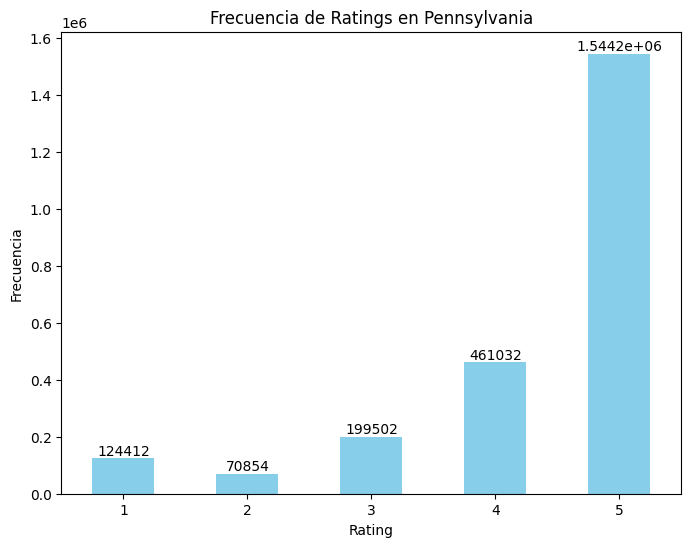

In [9]:
# Calcular la frecuencia de cada valor de rating
frecuencia_rating_pennsylvania = df_pennsylvania['rating'].value_counts(
).sort_index()

# Mostrar la frecuencia de ratings
print("Frecuencia de cada valor de rating en Pennsylvania:")
print(frecuencia_rating_pennsylvania)

plt.figure(figsize=(8, 6))
frecuencia_rating_pennsylvania.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Ratings en Pennsylvania')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
# Mostrar los números totales dentro de las barras
plt.bar_label(plt.gca().containers[0], label_type='edge', fontsize=10)
plt.show()

In [10]:
# Contar la frecuencia de cada valoración (rating) en el DataFrame
rating_counts = df_pennsylvania['rating'].value_counts().sort_index()

# Calcular el porcentaje de cada valoración y redondear a 2 decimales
rating_percentages = ((rating_counts / rating_counts.sum()) * 100).round(2)

# Mostrar los resultados
print("Porcentaje de cada valoración (rating) en Pennsylvania:")
print(rating_percentages)

Porcentaje de cada valoración (rating) en Pennsylvania:
1     5.18
2     2.95
3     8.31
4    19.21
5    64.34
Name: rating, dtype: float64


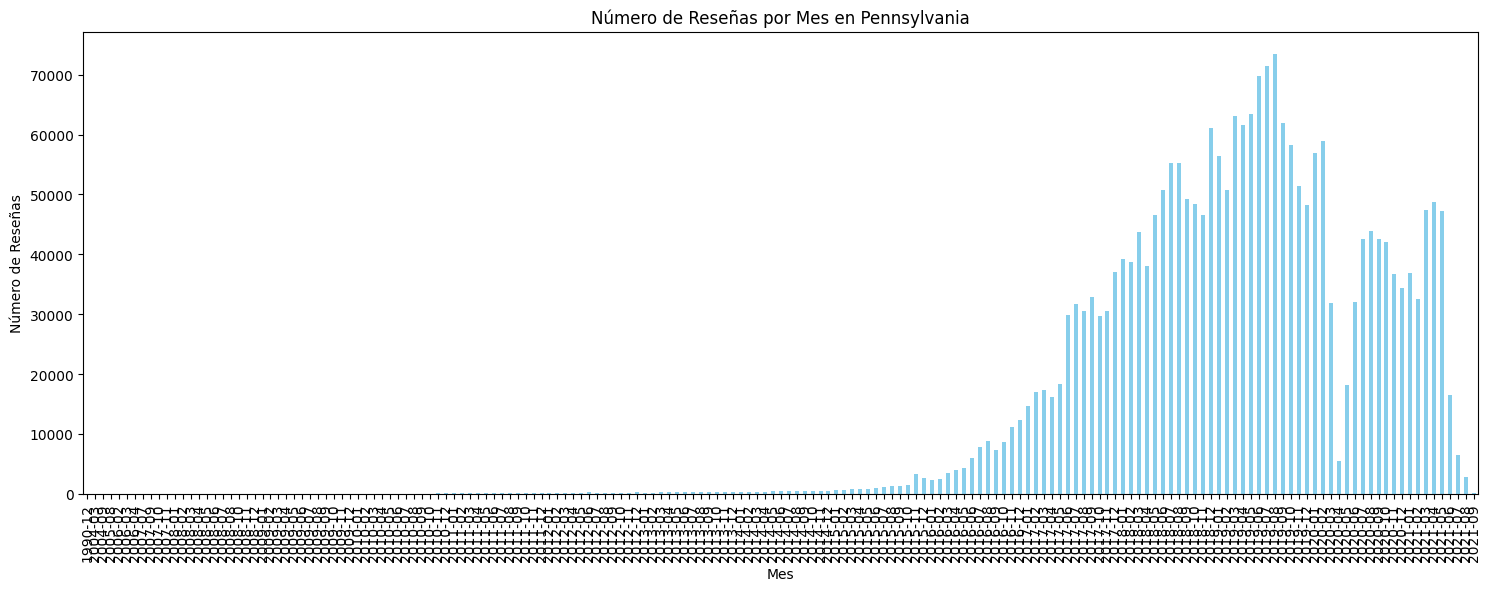

In [11]:
# Convertir la columna 'time' a formato datetime
df_pennsylvania['time'] = pd.to_datetime(df_pennsylvania['time'], unit='ms')

# Extraer el mes y el año de la columna de tiempo
df_pennsylvania['month'] = df_pennsylvania['time'].dt.to_period('M')

# Calcular la cantidad de reseñas por mes
cantidad_reseñas_mes_pennsylvania = df_pennsylvania['month'].value_counts(
).sort_index()

# Visualizar la distribución de reseñas por mes sin etiquetas de número
plt.figure(figsize=(18, 6))
cantidad_reseñas_mes_pennsylvania.plot(kind='bar', color='skyblue')
plt.title('Número de Reseñas por Mes en Pennsylvania')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Mostrar la cantidad de reseñas por mes
print("Cantidad de reseñas por mes en Pennsylvania:")
print(cantidad_reseñas_mes_pennsylvania)

Cantidad de reseñas por mes en Pennsylvania:
1990-12        1
2004-03        2
2004-09        1
2005-08        1
2006-02       14
           ...  
2021-05    47202
2021-06    16553
2021-07     6545
2021-08     2753
2021-09      127
Freq: M, Name: month, Length: 175, dtype: int64


In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar el lexicon de VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Filtrar las reseñas no nulas
df_pennsylvania_filtered = df_pennsylvania[df_pennsylvania['text'].notnull()]

# Calcular el puntaje de sentimiento para cada reseña
df_pennsylvania_filtered['sentiment_score'] = df_pennsylvania_filtered['text'].apply(
    lambda x: sia.polarity_scores(x)['compound'])

# Clasificar las reseñas como positivas o negativas
df_pennsylvania_filtered['sentiment_label'] = df_pennsylvania_filtered['sentiment_score'].apply(
    lambda x: 'Positiva' if x > 0 else ('Negativa' if x < 0 else 'Neutral'))

# Filtrar solo las reseñas positivas y negativas
df_pennsylvania_filtered = df_pennsylvania_filtered[
    df_pennsylvania_filtered['sentiment_label'] != 'Neutral']

# Contar el número de reseñas positivas y negativas
positive_reviews = df_pennsylvania_filtered[df_pennsylvania_filtered['sentiment_label']
                                            == 'Positiva'].shape[0]
negative_reviews = df_pennsylvania_filtered[df_pennsylvania_filtered['sentiment_label']
                                            == 'Negativa'].shape[0]
total_reviews = positive_reviews + negative_reviews

# Calcular los porcentajes de reseñas positivas y negativas
positive_percentage = round((positive_reviews / total_reviews) * 100, 2)
negative_percentage = round((negative_reviews / total_reviews) * 100, 2)

print(f"Porcentaje de Reseñas Positivas: {positive_percentage}%")
print(f"Porcentaje de Reseñas Negativas: {negative_percentage}%")
print(
    f"Suma total de los porcentajes (positivas + negativas): {positive_percentage + negative_percentage}%")

[nltk_data] Downloading package vader_lexicon to C:\Users\Lenovo
[nltk_data]     ThinkPad T440\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Porcentaje de Reseñas Positivas: 90.48%
Porcentaje de Reseñas Negativas: 9.52%
Suma total de los porcentajes (positivas + negativas): 100.0%


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Filtrar las reseñas no nulas
df_pennsylvania_filtered = df_pennsylvania[df_pennsylvania['text'].notnull()]

# Inicializar CountVectorizer para convertir texto en matriz de conteo de palabras
# Eliminar palabras comunes del inglés
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df_pennsylvania_filtered['text'])

# Sumar la cantidad de cada palabra
word_counts_sum = word_counts.sum(axis=0)

# Crear un DataFrame con las palabras y sus frecuencias
word_freq = [(word, word_counts_sum[0, idx])
             for word, idx in vectorizer.vocabulary_.items()]
word_freq_df = pd.DataFrame(word_freq, columns=['Palabra', 'Frecuencia'])

# Ordenar por frecuencia en orden descendente
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las 10 palabras más frecuentes
print(word_freq_df.head(10))

      Palabra  Frecuencia
43      great      407419
57       good      273529
26      place      222963
400      food      215007
74    service      204193
53       nice      154615
81   friendly      148615
141     staff      146088
78       time      104768
139      best      102219


In [15]:
# Calcular el porcentaje total de datos utilizables
total_percent_usable = percent_data_usable_pennsylvania.mean()

# Redondear a 2 decimales y mostrar el resultado
total_percent_usable = round(total_percent_usable, 2)
print(
    f'Porcentaje total de datos utilizables en Pennsylvania: {total_percent_usable:.2f}%')

Porcentaje total de datos utilizables en Pennsylvania: 71.44%


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Filtrar las reseñas no nulas
df_pennsylvania_filtered = df_pennsylvania[df_pennsylvania['text'].notnull()]

# Inicializar CountVectorizer para convertir texto en una matriz de conteo de palabras
# Eliminar palabras comunes del inglés
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df_pennsylvania_filtered['text'])

# Calcular la matriz de co-ocurrencia dispersa
co_occurrence_matrix_sparse = word_counts.T.dot(word_counts)

# Convertir la matriz dispersa a formato COO (Coordinate list) para facilitar la manipulación
coo = coo_matrix(co_occurrence_matrix_sparse)

# Crear un DataFrame a partir de la matriz COO para manipulación más fácil
co_occurrence_df = pd.DataFrame(
    {'word1': coo.row, 'word2': coo.col, 'co_occurrence': coo.data})

# Mapear los índices de palabras a sus términos reales
terms = vectorizer.get_feature_names_out()
co_occurrence_df['word1'] = co_occurrence_df['word1'].map(lambda x: terms[x])
co_occurrence_df['word2'] = co_occurrence_df['word2'].map(lambda x: terms[x])

# Filtrar solo las combinaciones donde la primera palabra es menor que la segunda (para evitar duplicados inversos)
co_occurrence_df = co_occurrence_df[co_occurrence_df['word1']
                                    < co_occurrence_df['word2']]

# Ordenar por la frecuencia de co-ocurrencia en orden descendente
top_combinations = co_occurrence_df.sort_values(
    by='co_occurrence', ascending=False).head(5)

# Imprimir las 5 combinaciones más frecuentes
print("Top 5 combinaciones de palabras más frecuentes y sus co-ocurrencias:")
for _, row in top_combinations.iterrows():
    print(f"({row['word1']}, {row['word2']}): {row['co_occurrence']}")

Top 5 combinaciones de palabras más frecuentes y sus co-ocurrencias:
(great, service): 102303
(great, place): 99906
(food, good): 99767
(food, great): 97872
(friendly, staff): 62454
